In [1]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [2]:
series=pd.read_csv('T1.csv')

In [3]:
series.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [4]:
series.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


##Information about features

-Date/Time (for 10 minutes intervals)

-LV ActivePower (kW): The power generated by the turbine for that moment

-Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)

-TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer

-Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly

In [5]:
series.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


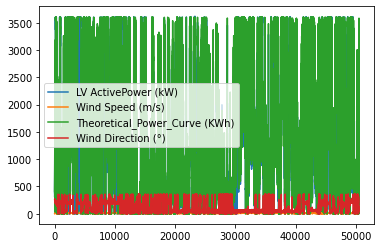

In [7]:
series.plot()

##Converting DateTime object into date/time format type

In [8]:
series['Date/Time'] = pd.to_datetime(series['Date/Time'],format='%d %m %Y %H:%M')
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [9]:
#set data as index
series.set_index("Date/Time",inplace=True)

In [10]:
series.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [11]:
series.index.min(),series.index.max() 

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 23:50:00'))

##Checking for Null Values

In [12]:
series.isnull().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

From above output we can conclude that there are no null values and we have data of one yea

##Visualization

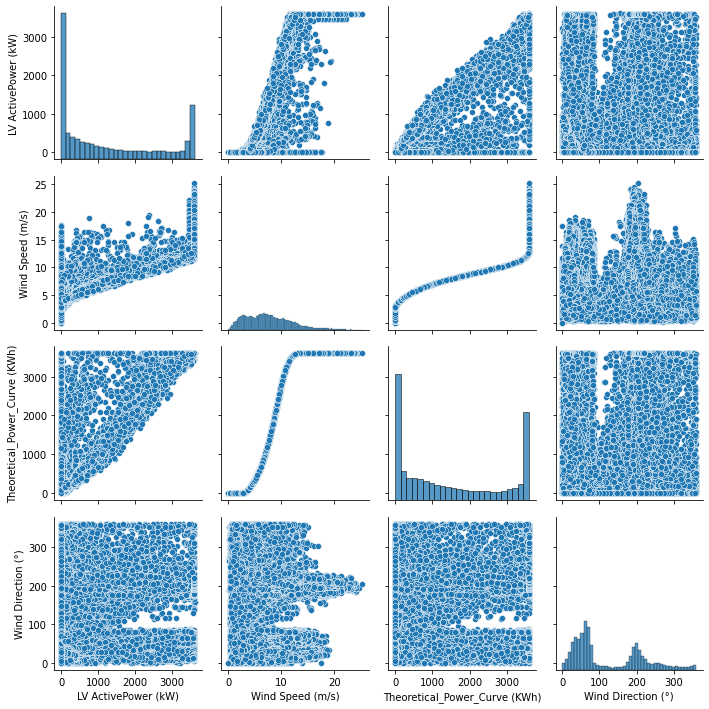

In [13]:
# Pair Plot correlation between all attributes
sns.pairplot(series)

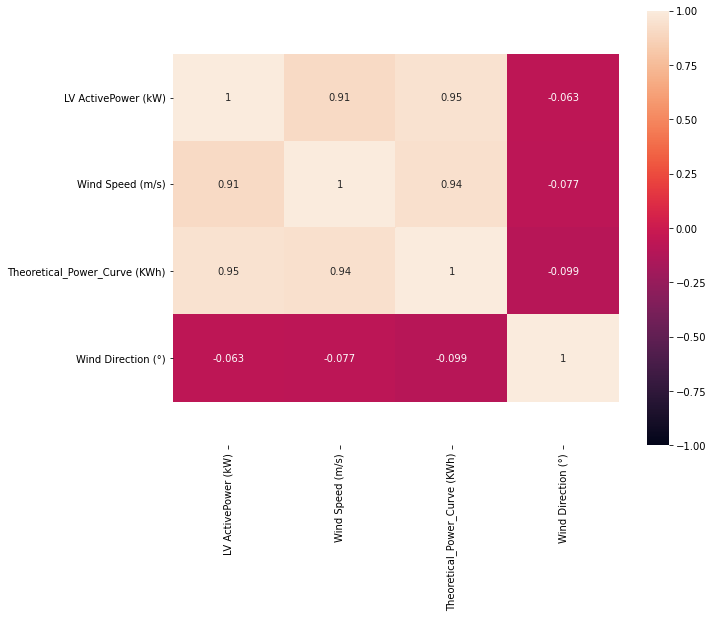

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [14]:
#correlation between the values
corr = series.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

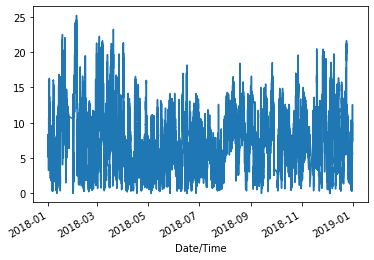

In [15]:
series['Wind Speed (m/s)'].plot()

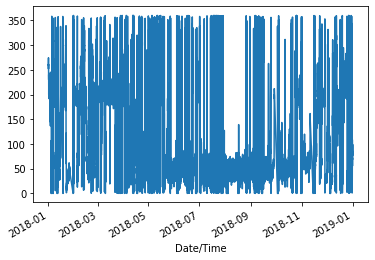

In [16]:
series['Wind Direction (°)'].plot()

##Pie Bar Chart (Wind Direction VS Wind Speed)

In [17]:
# Importing a visualization library
! pip install windrose

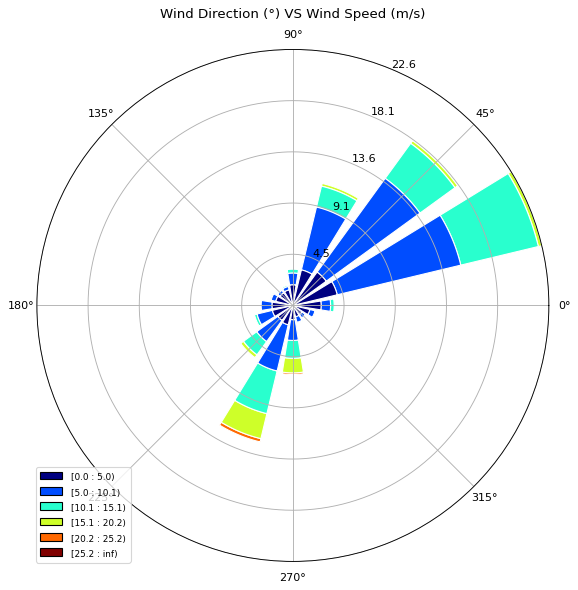

In [18]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(series['Wind Direction (°)'], series['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

##KDE plot

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions

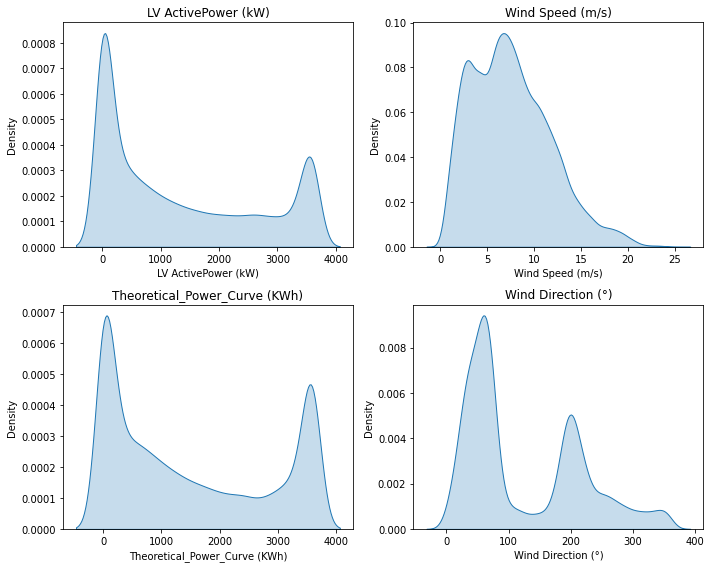

In [19]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(series.iloc[:,i], shade=True)
    plt.title(series.columns[i])
plt.tight_layout()
plt.show()

##To check data is stationary

In [20]:
##WIND SPEED
from statsmodels.tsa.stattools import adfuller
import random
random.seed(7)
# ADF Test
#Augmented Dickey–Fuller test
result = adfuller(series["Wind Speed (m/s)"].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -14.932536033900613
p-value: 1.3595630952781274e-27
Critial Values:
   1%, -3.4304794464033166
Critial Values:
   5%, -2.861597212664768
Critial Values:
   10%, -2.566800452407002


In [21]:
##WIND DIRECTION
from statsmodels.tsa.stattools import adfuller
import random
random.seed(7)
# ADF Test
#Augmented Dickey–Fuller test
result = adfuller(series["Wind Direction (°)"].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -12.650255902083122
p-value: 1.3732987440401944e-23
Critial Values:
   1%, -3.430479546414538
Critial Values:
   5%, -2.8615972568667196
Critial Values:
   10%, -2.566800475934405


##Applying LSTM to Wind direction

In [22]:
batch_size_exp = 1
epoch_exp = 7
neurons_exp = 10
predict_values_exp = 72
lag_exp=24

In [23]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [24]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [25]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [26]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [27]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [28]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model

In [29]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [30]:
del series['LV ActivePower (kW)']
del series['Wind Speed (m/s)']
del series['Theoretical_Power_Curve (KWh)']
series.head()

,Wind Direction (°)
Date/Time,
2018-01-01 00:00:00,259.994904
2018-01-01 00:10:00,268.641113
2018-01-01 00:20:00,272.564789
2018-01-01 00:30:00,271.258087
2018-01-01 00:40:00,265.674286


In [31]:
for i in range(0,10):
  series = series[:-1]
series.tail()

,Wind Direction (°)
Date/Time,
2018-12-31 21:30:00,79.699562
2018-12-31 21:40:00,80.132507
2018-12-31 21:50:00,80.081612
2018-12-31 22:00:00,80.452248
2018-12-31 22:10:00,80.960693


In [32]:
series.shape

(50520, 1)

In [33]:
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

In [34]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [35]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [36]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [37]:
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

50447/50447 [==============================] - 112s 2ms/step - loss: 0.0105


In [38]:
predictions = list()
expectations = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=61.852673, Expected=67.674561
Hour=2, Predicted=66.568031, Expected=71.880203
Hour=3, Predicted=58.642131, Expected=80.607430
Hour=4, Predicted=104.748004, Expected=81.242447
Hour=5, Predicted=62.747732, Expected=95.116180
Hour=6, Predicted=76.600619, Expected=108.525902
Hour=7, Predicted=113.676270, Expected=99.066833
Hour=8, Predicted=118.537415, Expected=83.458061
Hour=9, Predicted=89.062734, Expected=87.656326
Hour=10, Predicted=83.586363, Expected=78.961700
Hour=11, Predicted=84.841353, Expected=87.310623
Hour=12, Predicted=92.791553, Expected=89.737091
Hour=13, Predicted=96.208890, Expected=82.736252
Hour=14, Predicted=73.708991, Expected=81.974297
Hour=15, Predicted=79.590248, Expected=73.194389
Hour=16, Predicted=80.355534, Expected=75.005074
Hour=17, Predicted=88.444445, Expected=79.551987
Hour=18, Predicted=70.925748, Expected=76.018478
Hour=19, Predicted=69.297729, Expected=78.276291
Hour=20, Predicted=80.471581, Expected=68.145531
Hour=21, Predicted=73.602

In [40]:
direction = predictions

In [41]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))*100))

Mean Absolute Percent Error:  6.689344441713047


In [44]:
from matplotlib import pyplot

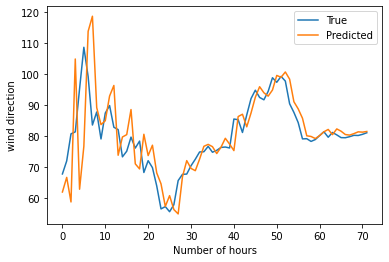

In [45]:
# line plot of observed vs predicted
pyplot.plot(raw_values[-predict_values_exp:], label="True")
pyplot.plot(predictions, label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("wind direction")
pyplot.show()

##Applying LSTM to Wind Speed

In [46]:
''' Loading data '''
import pandas as pd
series = pd.read_csv('T1.csv',index_col="Date/Time")
series.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [47]:
del series['LV ActivePower (kW)']
del series['Wind Direction (°)']
del series['Theoretical_Power_Curve (KWh)']
series.head()

,Wind Speed (m/s)
Date/Time,
01 01 2018 00:00,5.311336
01 01 2018 00:10,5.672167
01 01 2018 00:20,5.216037
01 01 2018 00:30,5.659674
01 01 2018 00:40,5.577941


In [48]:
for i in range(0,10):
  series = series[:-1]
series.tail()

,Wind Speed (m/s)
Date/Time,
31 12 2018 21:30,8.472826
31 12 2018 21:40,8.433422
31 12 2018 21:50,9.976660
31 12 2018 22:00,10.416830
31 12 2018 22:10,10.713670


In [49]:
series.shape

(50520, 1)

In [50]:
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

In [51]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [52]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [53]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [54]:
lstm_model_speed = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

50447/50447 [==============================] - 109s 2ms/step - loss: 0.0018


In [55]:
predictions = list()
expectations = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model_speed, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=2.970371, Expected=2.498550
Hour=2, Predicted=2.396023, Expected=2.620519
Hour=3, Predicted=2.528308, Expected=2.827516
Hour=4, Predicted=2.746846, Expected=2.563020
Hour=5, Predicted=2.478857, Expected=1.680800
Hour=6, Predicted=1.633101, Expected=2.386905
Hour=7, Predicted=2.313009, Expected=2.425185
Hour=8, Predicted=2.352610, Expected=2.946491
Hour=9, Predicted=2.906434, Expected=2.795087
Hour=10, Predicted=2.756516, Expected=3.916592
Hour=11, Predicted=3.887371, Expected=3.091043
Hour=12, Predicted=3.047834, Expected=2.892369
Hour=13, Predicted=2.846934, Expected=2.722504
Hour=14, Predicted=2.673144, Expected=2.869853
Hour=15, Predicted=2.824976, Expected=3.201952
Hour=16, Predicted=3.163094, Expected=3.861320
Hour=17, Predicted=3.833858, Expected=3.012923
Hour=18, Predicted=2.998716, Expected=2.998981
Hour=19, Predicted=2.975966, Expected=2.647908
Hour=20, Predicted=2.618455, Expected=2.796982
Hour=21, Predicted=2.774054, Expected=3.670288
Hour=22, Predicted=3.6

In [ ]:
speed = predictions

In [ ]:
df = pd.DataFrame(speed, columns = ['windspeed'])

In [ ]:
df.to_csv('/content/drive/My Drive/prediction.csv')

In [ ]:
df.head()

In [ ]:
df.insert(1, 'winddirection', direction)

In [ ]:
df.head()

In [ ]:
df["winddirection"] = df.winddirection.astype(float)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.to_csv('/content/drive/My Drive/predictions.csv')

In [ ]:
df.info()

In [56]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))*100))

Mean Absolute Percent Error:  9.89853521052094


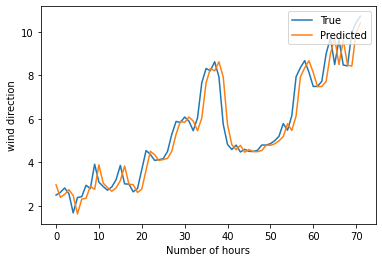

In [57]:
# line plot of observed vs predicted
pyplot.plot(raw_values[-predict_values_exp:], label="True")
pyplot.plot(predictions, label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("wind direction")
pyplot.show()

In [58]:
import pickle

In [60]:
wind = {"speedmodel": lstm_model_speed, "directionmodel": lstm_model}
with open('savedmodel.pkl', 'wb') as file:
    pickle.dump(wind, file)

INFO:tensorflow:Assets written to: ram://c0252305-8b0d-4dc4-a89a-318922bc9c3f/assets


INFO:tensorflow:Assets written to: ram://c0252305-8b0d-4dc4-a89a-318922bc9c3f/assets


INFO:tensorflow:Assets written to: ram://f0f917bf-bc94-42b2-8167-082bcdb1bfd4/assets


INFO:tensorflow:Assets written to: ram://f0f917bf-bc94-42b2-8167-082bcdb1bfd4/assets


In [61]:
with open('savedmodel.pkl', 'rb') as file:
    wind = pickle.load(file)

In [62]:
speed_loaded = wind["speedmodel"]
direction_loaded = wind['directionmodel']